# Exploratory Data Analysis for Loan Details

In [1]:
import pandas as pd

df = pd.read_csv('state_FL.csv')


C:\Users\Jackson Windhorst\AppData\Local\Temp\ipykernel_2500\2635022136.py:3: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('state_FL.csv')


In [2]:
for column in df.columns:
    print(column)

activity_year
lei
derived_msa-md
state_code
county_code
census_tract
conforming_loan_limit
derived_loan_product_type
derived_dwelling_category
derived_ethnicity
derived_race
derived_sex
action_taken
purchaser_type
preapproval
loan_type
loan_purpose
lien_status
reverse_mortgage
open-end_line_of_credit
business_or_commercial_purpose
loan_amount
loan_to_value_ratio
interest_rate
rate_spread
hoepa_status
total_loan_costs
total_points_and_fees
origination_charges
discount_points
lender_credits
loan_term
prepayment_penalty_term
intro_rate_period
negative_amortization
interest_only_payment
balloon_payment
other_nonamortizing_features
property_value
construction_method
occupancy_type
manufactured_home_secured_property_type
manufactured_home_land_property_interest
total_units
multifamily_affordable_units
income
debt_to_income_ratio
applicant_credit_score_type
co-applicant_credit_score_type
applicant_ethnicity-1
applicant_ethnicity-2
applicant_ethnicity-3
applicant_ethnicity-4
applicant_ethnicit

In [3]:
threshold = 0.8
high_na_columns = df.columns[df.isnull().mean() >= threshold]

# Print removed columns
print(f"Columns removed (>= {threshold * 100}% NAs): {list(high_na_columns)}")

# Drop the columns
df = df.drop(columns=high_na_columns)
df.head(5)


Columns removed (>= 80.0% NAs): ['total_points_and_fees', 'lender_credits', 'prepayment_penalty_term', 'intro_rate_period', 'multifamily_affordable_units', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'co-applicant_ethnicity-2', 'co-applicant_ethnicity-3', 'co-applicant_ethnicity-4', 'co-applicant_ethnicity-5', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'co-applicant_race-2', 'co-applicant_race-3', 'co-applicant_race-4', 'co-applicant_race-5', 'aus-2', 'aus-3', 'aus-4', 'aus-5', 'denial_reason-2', 'denial_reason-3', 'denial_reason-4']


,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2023,549300JOT0D4J0SZIK67,29460,FL,12105.0,1.210501e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,2570,43.15,74300,111.11,441,716,25
1,2023,549300JOT0D4J0SZIK67,22744,FL,12011.0,1.201107e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,7685,57.29,88500,131.27,2199,2626,32
2,2023,549300JOT0D4J0SZIK67,45300,FL,12053.0,1.205304e+10,C,FHA:First Lien,Single Family (1-4 Units):Manufactured,Ethnicity Not Available,...,3,6,10,4658,14.60,89400,70.39,2241,3029,33
3,2023,549300JOT0D4J0SZIK67,19660,FL,12127.0,1.212708e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,5831,27.99,79400,117.94,1478,2240,31
4,2023,549300JOT0D4J0SZIK67,36740,FL,12097.0,1.209704e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,7936,90.02,85700,64.11,1408,2852,18


In [4]:
df.drop_duplicates()
df.head(5)

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2023,549300JOT0D4J0SZIK67,29460,FL,12105.0,1.210501e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,2570,43.15,74300,111.11,441,716,25
1,2023,549300JOT0D4J0SZIK67,22744,FL,12011.0,1.201107e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,7685,57.29,88500,131.27,2199,2626,32
2,2023,549300JOT0D4J0SZIK67,45300,FL,12053.0,1.205304e+10,C,FHA:First Lien,Single Family (1-4 Units):Manufactured,Ethnicity Not Available,...,3,6,10,4658,14.60,89400,70.39,2241,3029,33
3,2023,549300JOT0D4J0SZIK67,19660,FL,12127.0,1.212708e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,5831,27.99,79400,117.94,1478,2240,31
4,2023,549300JOT0D4J0SZIK67,36740,FL,12097.0,1.209704e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,7936,90.02,85700,64.11,1408,2852,18


In [5]:
import numpy as np

for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
        
df.head(5)

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2023.0,549300JOT0D4J0SZIK67,29460.0,FL,12105.0,1.210501e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,1.0,6.0,10.0,2570.0,43.15,74300.0,111.11,441.0,716.0,25.0
1,2023.0,549300JOT0D4J0SZIK67,22744.0,FL,12011.0,1.201107e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,1.0,6.0,10.0,7685.0,57.29,88500.0,131.27,2199.0,2626.0,32.0
2,2023.0,549300JOT0D4J0SZIK67,45300.0,FL,12053.0,1.205304e+10,C,FHA:First Lien,Single Family (1-4 Units):Manufactured,Ethnicity Not Available,...,1.0,6.0,10.0,4658.0,14.60,89400.0,70.39,2241.0,3029.0,33.0
3,2023.0,549300JOT0D4J0SZIK67,19660.0,FL,12127.0,1.212708e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,1.0,6.0,10.0,5831.0,27.99,79400.0,117.94,1478.0,2240.0,31.0
4,2023.0,549300JOT0D4J0SZIK67,36740.0,FL,12097.0,1.209704e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,1.0,6.0,10.0,7936.0,90.02,85700.0,64.11,1408.0,2852.0,18.0


In [6]:
for column in df.columns:
    print(column)

activity_year
lei
derived_msa-md
state_code
county_code
census_tract
conforming_loan_limit
derived_loan_product_type
derived_dwelling_category
derived_ethnicity
derived_race
derived_sex
action_taken
purchaser_type
preapproval
loan_type
loan_purpose
lien_status
reverse_mortgage
open-end_line_of_credit
business_or_commercial_purpose
loan_amount
loan_to_value_ratio
interest_rate
rate_spread
hoepa_status
total_loan_costs
origination_charges
discount_points
loan_term
negative_amortization
interest_only_payment
balloon_payment
other_nonamortizing_features
property_value
construction_method
occupancy_type
manufactured_home_secured_property_type
manufactured_home_land_property_interest
total_units
income
debt_to_income_ratio
applicant_credit_score_type
co-applicant_credit_score_type
applicant_ethnicity-1
co-applicant_ethnicity-1
applicant_ethnicity_observed
co-applicant_ethnicity_observed
applicant_race-1
co-applicant_race-1
applicant_race_observed
co-applicant_race_observed
applicant_sex
co-a

In [7]:
# Get all unique LEIs
unique_leis = df['lei'].unique()

# Print each unique LEI using a for loop
print("Unique LEI codes:")
for lei in unique_leis:
    print(lei)


Unique LEI codes:
549300JOT0D4J0SZIK67
254900FBWEZ3YUPOBN33
549300NZ2IPWRMLAYZ30
5493003I223S7AP6XL58
549300R22XCNNGVXRO22
549300P8KQYPAVPZL931
875500CPQ9Z7QEFE5G90
5493009SXBJ8LKIU7Q54
549300KPHGEE40YQXO21
549300SQKZC6HESYGO25
549300JX8UXNIMMZYW86
549300OTLWFQPOOSC346
549300NWKILSNQAIG053
2549006RTCWYNJPDX013
549300HG6U7GIJKDOO88
254900JXCS783CPF1D02
549300SJTLYB6ZWKPR88
549300MPX7PJGFD8HA09
254900FN90BBXGBCPB30
254900NCYRSD12LNF831
549300L1U2HOTC8O4K95
5493009BD405QQTMXO12
549300EKFFG3BU8DNX74
549300SLZFPDLWNB0O94
549300HWDY3N8UVJO697
549300U82B82JH54TO79
5493000NZZZU3GFIYL71
549300RN01LBYR8ZVX74
5493000XC2Y1SLXRQP11
54930078TNN7GKZ7NU89
5493001JT9MT3Z3Y3M39
XC7Z0BA39TU7L1AKOJ12
MCXHCL35UUWDZK7NCQ61
549300ULM1VXY8SV3Z64
5493004KLDVVA608R237
5493002N5OA6GM61AC70
549300DPRWSBUY619V27
254900YY36UO9MBPH808
G5AHTAP80NWA3Q8RDC78
549300V8CF81JGIV7038
5493005A0757T9GRRI44
549300RM7ARTTP3T1V93
N8T7HW55LK5D2ORCKP39
549300S32ZDD67D2FB46
549300IKNQI45EOJU155
JJKC32MCHWDI71265Z06
549300RXD00V454J

In [8]:
# Count occurrences of each LEI
lei_counts = df['lei'].value_counts()

# Get top 50 or top 100 LEIs (you can change the number here)
top_50_leis = lei_counts.head(50)

# Print top 50 LEIs
print("Top 50 LEIs with most occurrences:")
print(top_50_leis)

Top 50 LEIs with most occurrences:
lei
549300HW662MN1WU8550    62759
549300FGXN1K3HLB1R50    37549
RVDPPPGHCGZ40J4VQ731    36390
B4TYDEB6GKMZO031MB27    33546
549300NOCASXPA34X033    31308
X05BVSK68TQ7YTOSNR22    22499
JJKC32MCHWDI71265Z06    22318
5493003GQDUH26DNNH17    21393
5493001SXWZ4OFP8Z903    17547
549300VZVN841I2ILS84    17049
549300FNXYY540N23N64    16135
EQTWLK1G7ODGC2MGLV11    15858
7H6GLXDRUGQFU57RNE97    14698
549300TOOOOW36EX6R40    14454
549300XQVJ1XBNFA5536    13930
549300H3IZO24NSOO931    13591
254900HA4DQWAE0W3342    12925
549300VN9E1DEKF26E34    12692
549300AG64NHILB7ZP05    12678
AD6GFRVSDT01YPT1CS68    11857
5493008CPTDVOS570626    11354
03D0JEWFDFUS0SEEKG89    11304
549300U3721PJGQZYY68    11048
549300DD5QQUHO6PCH70    11009
KB1H1DSPRFMYMCUFXT09    10422
254900UL88QFG0E40516     9590
6BYL5QZYBDK8S7L73M02     8942
54930036K3ZFJ4FOKT69     8521
DRMSV1Q0EKMEXLAU1P80     8460
549300DD4R4SYK5RAQ92     8371
5493005JPZ3LXXMB0S24     8250
549300K7224BC1IAX207     8140
5

In [9]:
lei_counts = df['lei'].value_counts()

# Get the top 50 LEIs
top_50_leis = lei_counts.head(50).index

# Filter the DataFrame to only include rows with LEIs in the top 50
filtered_df = df[df['lei'].isin(top_50_leis)]
filtered_df.head(5)

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
8440,2023.0,JJKC32MCHWDI71265Z06,42680.0,FL,12061.0,1.206105e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Joint,...,1.0,3.0,10.0,6984.0,47.92,79200.0,68.67,1218.0,2105.0,19.0
8469,2023.0,JJKC32MCHWDI71265Z06,35840.0,FL,12115.0,1.211500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,1.0,6.0,10.0,4922.0,8.82,98700.0,123.78,1559.0,2208.0,12.0
8470,2023.0,JJKC32MCHWDI71265Z06,45300.0,FL,12057.0,1.205700e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1.0,6.0,10.0,2584.0,52.32,89400.0,102.76,645.0,893.0,50.0
8471,2023.0,JJKC32MCHWDI71265Z06,35840.0,FL,12115.0,1.211500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Joint,...,1.0,1.0,10.0,5404.0,27.05,98700.0,126.00,1418.0,1907.0,16.0
8472,2023.0,JJKC32MCHWDI71265Z06,33124.0,FL,12086.0,1.208600e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1.0,6.0,10.0,3082.0,57.04,74700.0,203.14,655.0,872.0,67.0


In [10]:
filtered_rows = len(filtered_df)
print(f"Rows in the filtered DataFrame: {filtered_rows}")

Rows in the filtered DataFrame: 669872


In [11]:
filtered_df = filtered_df.drop(columns=['activity_year', 'state_code'])
filtered_df.head(5)


,lei,derived_msa-md,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
8440,JJKC32MCHWDI71265Z06,42680.0,12061.0,1.206105e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Joint,White,Male,...,1.0,3.0,10.0,6984.0,47.92,79200.0,68.67,1218.0,2105.0,19.0
8469,JJKC32MCHWDI71265Z06,35840.0,12115.0,1.211500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,...,1.0,6.0,10.0,4922.0,8.82,98700.0,123.78,1559.0,2208.0,12.0
8470,JJKC32MCHWDI71265Z06,45300.0,12057.0,1.205700e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Joint,Joint,...,1.0,6.0,10.0,2584.0,52.32,89400.0,102.76,645.0,893.0,50.0
8471,JJKC32MCHWDI71265Z06,35840.0,12115.0,1.211500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Joint,White,Joint,...,1.0,1.0,10.0,5404.0,27.05,98700.0,126.00,1418.0,1907.0,16.0
8472,JJKC32MCHWDI71265Z06,33124.0,12086.0,1.208600e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,...,1.0,6.0,10.0,3082.0,57.04,74700.0,203.14,655.0,872.0,67.0


In [12]:
lei_mapping = {
    "549300HW662MN1WU8550": "UNITED WHOLESALE MORTGAGE, LLC",
    "549300FGXN1K3HLB1R50": "ROCKET MORTGAGE, LLC",
    "RVDPPPGHCGZ40J4VQ731": "PENNYMAC LOAN SERVICES, LLC",
    "B4TYDEB6GKMZO031MB27": "Bank of America, National Association",
    "549300NOCASXPA34X033": "LAKEVIEW LOAN SERVICING, LLC",
    "X05BVSK68TQ7YTOSNR22": "Discover Bank",
    "JJKC32MCHWDI71265Z06": "Truist Bank",
    "5493003GQDUH26DNNH17": "NAVY FEDERAL CREDIT UNION",
    "5493001SXWZ4OFP8Z903": "DHI MORTGAGE COMPANY, LTD.",
    "549300VZVN841I2ILS84": "CROSSCOUNTRY MORTGAGE, LLC",
    "549300FNXYY540N23N64": "NEWREZ LLC",
    "EQTWLK1G7ODGC2MGLV11": "Regions Bank",
    "7H6GLXDRUGQFU57RNE97": "JPMorgan Chase Bank, National Association",
    "03D0JEWFDFUS0SEEKG89": "TD Bank, National Association",
    "549300TOOOOW36EX6R40": "SUNCOAST CREDIT UNION",
    "549300XQVJ1XBNFA5536": "21ST MORTGAGE CORPORATION",
    "549300H3IZO24NSOO931": "LENNAR MORTGAGE, LLC",
    "254900HA4DQWAE0W3342": "AMERIHOME MORTGAGE COMPANY, LLC",
    "549300VN9E1DEKF26E34": "SPACE COAST CREDIT UNION",
    "549300AG64NHILB7ZP05": "LOANDEPOT.COM, LLC",
    "AD6GFRVSDT01YPT1CS68": "PNC Bank, National Association",
    "5493008CPTDVOS570626": "Third Federal Savings and Loan Association of Cleveland",
    "549300U3721PJGQZYY68": "GUARANTEED RATE, INC.",
    "549300DD5QQUHO6PCH70": "Mortgage Research Center, LLC",
    "KB1H1DSPRFMYMCUFXT09": "Wells Fargo Bank, National Association",
    "254900UL88QFG0E40516": "FIGURE LENDING LLC",
    "6BYL5QZYBDK8S7L73M02": "U.S. Bank National Association",
    "54930036K3ZFJ4FOKT69": "VYSTAR CREDIT UNION",
    "DRMSV1Q0EKMEXLAU1P80": "Citizens Bank, National Association",
    "549300DD4R4SYK5RAQ92": "MOVEMENT MORTGAGE, LLC",
    "5493005JPZ3LXXMB0S24": "FBC MORTGAGE, LLC",
    "549300K7224BC1IAX207": "MIDFLORIDA",
    "549300YIQ7S7Z8PIHE53": "AMERISAVE MORTGAGE CORPORATION",
    "549300LYRWPSYPK6S325": "FREEDOM MORTGAGE CORPORATION",
    "SS1TRMSN6BRNMOREEV51": "Flagstar Bank, National Association",
    "549300E2UX99HKDBR481": "NEW AMERICAN FUNDING, LLC",
    "549300MGPZBLQDIL7538": "FAIRWAY INDEPENDENT MORTGAGE CORPORATION",
    "QFROUN1UWUYU0DVIWD51": "Fifth Third Bank, National Association",
    "254900ZFWS2106HWPH46": "Paramount Residential Mortgage Group, Inc.",
    "5493004WMLN60ZJ2ON46": "PULTE MORTGAGE LLC",
    "549300VORTI31GZTJL53": "CARDINAL FINANCIAL COMPANY, LIMITED PARTNERSHIP",
    "54930021WPEXNHYZUL09": "PLANET HOME LENDING, LLC",
    "8I3UVGYULPJQIP7FQV10": "SouthState Bank, National Association",
    "549300XWUSRVVOHPRY47": "EVERETT FINANCIAL, INC.",
    "5493001GCBD5XGNIC815": "Coastal Community Bank",
    "549300GKFNPRWNS0GF29": "CMG MORTGAGE, INC.",
    "5493000YNV8IX4VD3X12": "VANDERBILT MORTGAGE AND FINANCE, INC.",
    "549300CB67L6KPJLHE19": "TRIAD FINANCIAL SERVICES, INC.",
    "5493001WHVQBGRSWEU75": "HOMEBRIDGE FINANCIAL SERVICES, INC.",
    "5493007CXTOHZ2JBEJ61": "THE MORTGAGE FIRM, INC."
}


filtered_df['institution_name'] = filtered_df['lei'].map(lei_mapping)
filtered_df.head(5)

,lei,derived_msa-md,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,...,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,institution_name
8440,JJKC32MCHWDI71265Z06,42680.0,12061.0,1.206105e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Joint,White,Male,...,3.0,10.0,6984.0,47.92,79200.0,68.67,1218.0,2105.0,19.0,Truist Bank
8469,JJKC32MCHWDI71265Z06,35840.0,12115.0,1.211500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,...,6.0,10.0,4922.0,8.82,98700.0,123.78,1559.0,2208.0,12.0,Truist Bank
8470,JJKC32MCHWDI71265Z06,45300.0,12057.0,1.205700e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Joint,Joint,...,6.0,10.0,2584.0,52.32,89400.0,102.76,645.0,893.0,50.0,Truist Bank
8471,JJKC32MCHWDI71265Z06,35840.0,12115.0,1.211500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Joint,White,Joint,...,1.0,10.0,5404.0,27.05,98700.0,126.00,1418.0,1907.0,16.0,Truist Bank
8472,JJKC32MCHWDI71265Z06,33124.0,12086.0,1.208600e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,...,6.0,10.0,3082.0,57.04,74700.0,203.14,655.0,872.0,67.0,Truist Bank


In [13]:
filtered_df = filtered_df.drop(columns=['lei'])
filtered_df.head(5)

,derived_msa-md,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,institution_name
8440,42680.0,12061.0,1.206105e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Joint,White,Male,4.0,...,3.0,10.0,6984.0,47.92,79200.0,68.67,1218.0,2105.0,19.0,Truist Bank
8469,35840.0,12115.0,1.211500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6.0,...,6.0,10.0,4922.0,8.82,98700.0,123.78,1559.0,2208.0,12.0,Truist Bank
8470,45300.0,12057.0,1.205700e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Joint,Joint,3.0,...,6.0,10.0,2584.0,52.32,89400.0,102.76,645.0,893.0,50.0,Truist Bank
8471,35840.0,12115.0,1.211500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Joint,White,Joint,2.0,...,1.0,10.0,5404.0,27.05,98700.0,126.00,1418.0,1907.0,16.0,Truist Bank
8472,33124.0,12086.0,1.208600e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,2.0,...,6.0,10.0,3082.0,57.04,74700.0,203.14,655.0,872.0,67.0,Truist Bank


In [14]:
# Reorder columns to move 'institution_name' to the first position
cols = ['institution_name'] + [col for col in filtered_df.columns if col != 'institution_name']
filtered_df = filtered_df[cols]

# Check the updated DataFrame
filtered_df.head()

,institution_name,derived_msa-md,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
8440,Truist Bank,42680.0,12061.0,1.206105e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Joint,White,Male,...,1.0,3.0,10.0,6984.0,47.92,79200.0,68.67,1218.0,2105.0,19.0
8469,Truist Bank,35840.0,12115.0,1.211500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,...,1.0,6.0,10.0,4922.0,8.82,98700.0,123.78,1559.0,2208.0,12.0
8470,Truist Bank,45300.0,12057.0,1.205700e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Joint,Joint,...,1.0,6.0,10.0,2584.0,52.32,89400.0,102.76,645.0,893.0,50.0
8471,Truist Bank,35840.0,12115.0,1.211500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Joint,White,Joint,...,1.0,1.0,10.0,5404.0,27.05,98700.0,126.00,1418.0,1907.0,16.0
8472,Truist Bank,33124.0,12086.0,1.208600e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,...,1.0,6.0,10.0,3082.0,57.04,74700.0,203.14,655.0,872.0,67.0


In [16]:
filtered_df.to_csv('checking.csv', index=False)

In [17]:
for column in filtered_df.columns:
    print(column)

institution_name
derived_msa-md
county_code
census_tract
conforming_loan_limit
derived_loan_product_type
derived_dwelling_category
derived_ethnicity
derived_race
derived_sex
action_taken
purchaser_type
preapproval
loan_type
loan_purpose
lien_status
reverse_mortgage
open-end_line_of_credit
business_or_commercial_purpose
loan_amount
loan_to_value_ratio
interest_rate
rate_spread
hoepa_status
total_loan_costs
origination_charges
discount_points
loan_term
negative_amortization
interest_only_payment
balloon_payment
other_nonamortizing_features
property_value
construction_method
occupancy_type
manufactured_home_secured_property_type
manufactured_home_land_property_interest
total_units
income
debt_to_income_ratio
applicant_credit_score_type
co-applicant_credit_score_type
applicant_ethnicity-1
co-applicant_ethnicity-1
applicant_ethnicity_observed
co-applicant_ethnicity_observed
applicant_race-1
co-applicant_race-1
applicant_race_observed
co-applicant_race_observed
applicant_sex
co-applicant_sex

# Consumer Demographics

**Variables investigated**: derived_ethnicity,derived_race,derived_sex


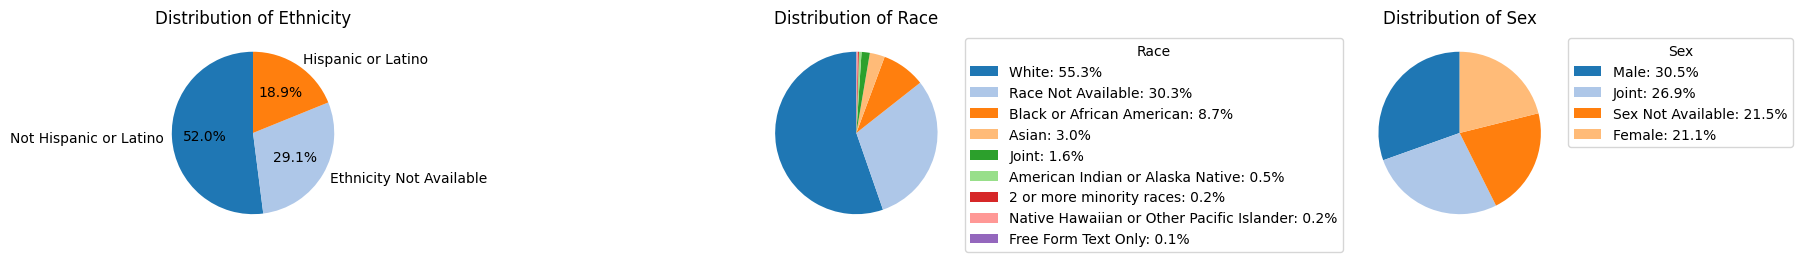

In [18]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
ethnicity_counts = filtered_df['derived_ethnicity'].value_counts()
race_counts = filtered_df['derived_race'].value_counts()
sex_counts = filtered_df['derived_sex'].value_counts()

relevant_categories = ['Not Hispanic or Latino', 'Ethnicity Not Available', 'Hispanic or Latino']
filtered_ethnicity_counts = ethnicity_counts[ethnicity_counts.index.isin(relevant_categories)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

# Ethnicity Pie Chart
axes[0].pie(
    filtered_ethnicity_counts, 
    labels=filtered_ethnicity_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.tab20.colors[:len(filtered_ethnicity_counts)]
)
axes[0].set_title("Distribution of Ethnicity")

# Race Pie Chart (without percentages on plot)
wedges, texts = axes[1].pie(
    race_counts, 
    startangle=90, 
    colors=plt.cm.tab20.colors[:len(race_counts)],
    pctdistance=0.85,  # Move the labels outside the pie
    labeldistance=None  # Remove the default labels from the pie chart
)

# Prepare the legend with percentages
labels_with_percentages = [f"{label}: {percentage:.1f}%" for label, percentage in zip(race_counts.index, race_counts / race_counts.sum() * 100)]

# Add legend with custom labels
axes[1].legend(
    labels_with_percentages, 
    title="Race",
    loc="upper left", 
    bbox_to_anchor=(1, 1)  # Position the legend outside the plot
)
axes[1].set_title("Distribution of Race")

# Sex Pie Chart (without percentages on plot)
wedges, texts = axes[2].pie(
    sex_counts, 
    startangle=90, 
    colors=plt.cm.tab20.colors[:len(sex_counts)],
    pctdistance=0.85,  # Move the labels outside the pie
    labeldistance=None  # Remove the default labels from the pie chart
)

# Prepare the legend with percentages
labels_with_percentages = [f"{label}: {percentage:.1f}%" for label, percentage in zip(sex_counts.index, sex_counts / sex_counts.sum() * 100)]

# Add legend with custom labels
axes[2].legend(
    labels_with_percentages, 
    title="Sex",
    loc="upper left", 
    bbox_to_anchor=(1, 1)  # Position the legend outside the plot
)
axes[2].set_title("Distribution of Sex")

plt.tight_layout()
plt.show()

# Loan Characteristics

**Variables investigated**: loan_amount, interest_rate, rate_spread, loan_purpose, derived_loan_product_type, total_loan_costs,origination_charges, discount_points

In [19]:
numeric_columns = ['loan_amount', 'interest_rate', 'rate_spread',
                   'total_loan_costs','origination_charges', 
                   'discount_points']
for column in numeric_columns:
    print(f"Descriptive statistics for {column}:")
    print(filtered_df[column].describe())  
    print("\n")  

Descriptive statistics for loan_amount:
count    669872.000000
mean     252100.057922
std      179918.784044
min        5000.000000
25%      105000.000000
50%      235000.000000
75%      355000.000000
max      755000.000000
Name: loan_amount, dtype: float64


Descriptive statistics for interest_rate:
count     398872.0
unique      4655.0
top            0.0
freq       12434.0
Name: interest_rate, dtype: float64


Descriptive statistics for rate_spread:
count     277854.00
unique     21899.00
top            0.28
freq         520.00
Name: rate_spread, dtype: float64


Descriptive statistics for total_loan_costs:
count     309983.0
unique    237913.0
top            0.0
freq       18241.0
Name: total_loan_costs, dtype: float64


Descriptive statistics for origination_charges:
count     311633.0
unique    146256.0
top            0.0
freq       46820.0
Name: origination_charges, dtype: float64


Descriptive statistics for discount_points:
count     185506.0
unique    137576.0
top            1

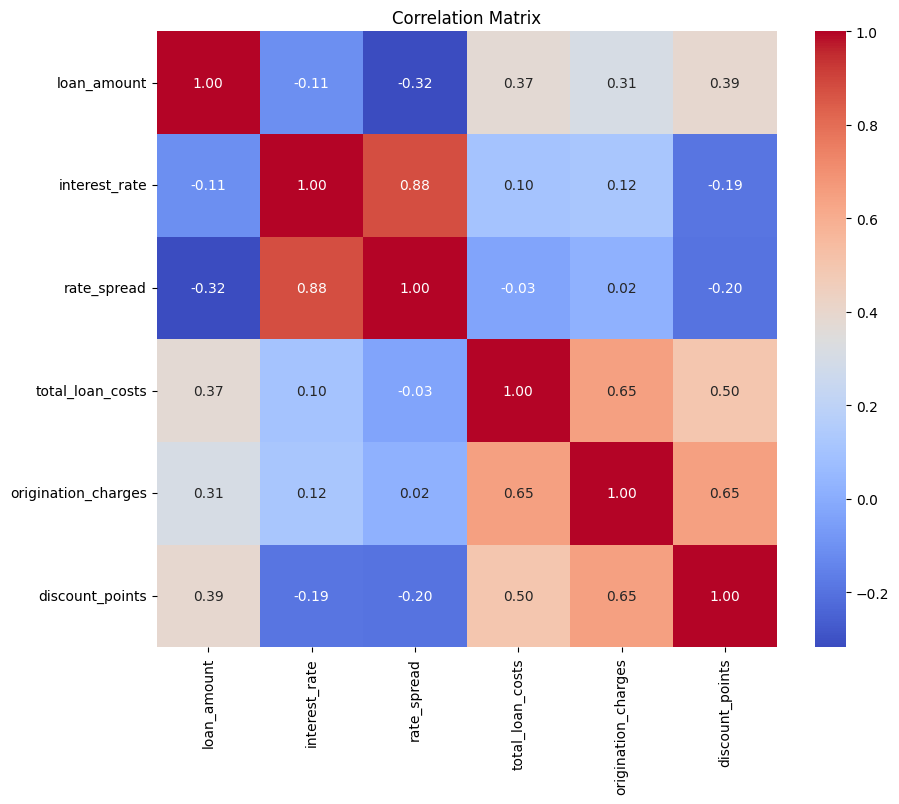

In [20]:
import seaborn as sns

# Correlation matrix
correlation_matrix = filtered_df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


For loan purpose the codes are: 1 - Home purchase, 2 - Home improvement, 8.5 - Refinancing, 4 - other purpose, 5 - NA

In [21]:
categorical_columns = ['loan_purpose', 'derived_loan_product_type']

for col in categorical_columns:
    print(df[col].value_counts())
    print("\n")

loan_purpose
1.0    613246
8.5    202115
4.0    115152
2.0    102746
5.0      2102
Name: count, dtype: int64


derived_loan_product_type
Conventional:First Lien          534247
Conventional:Subordinate Lien    235447
FHA:First Lien                   177744
VA:First Lien                     85677
FSA/RHS:First Lien                 1614
FSA/RHS:Subordinate Lien            362
FHA:Subordinate Lien                259
VA:Subordinate Lien                  11
Name: count, dtype: int64




# Property Details

**Variables investigated**: property_value, county_code, occupancy_type

In [22]:
occupancy_type_counts = filtered_df['occupancy_type'].value_counts()
print(occupancy_type_counts)

occupancy_type
1.0    669872
Name: count, dtype: int64


In [23]:
filtered_df['property_value'].apply(type).value_counts()


property_value
<class 'float'>    356655
<class 'str'>      214914
<class 'int'>       98303
Name: count, dtype: int64

In [24]:
# Replace all strings in the property_value column with 0
filtered_df['property_value'] = filtered_df['property_value'].apply(
    lambda x: 0 if isinstance(x, str) else x
)
print(filtered_df['property_value'].apply(type).value_counts())


property_value
<class 'float'>    669872
Name: count, dtype: int64


In [ ]:
highest_property_values = filtered_df.groupby('county_code')['property_value'].max().reset_index()

# Sort values in descending order and take the top 10
top_10_counties = highest_property_values.sort_values(by='property_value', ascending=False).head(10)

# Reset the index
top_10_counties = top_10_counties.reset_index(drop=True)

print(top_10_counties)

These features are the best to investigate for why a consumer would choose a mortgage at a certain institution over another. They contain the most relevant information to the research problem

**Institution_name, loan_amount, interest_rate, rate_spread, income, applicant_credit_score_type, property_value, action_taken**

In [30]:
print(filtered_df['rate_spread'].dtype)  # Check data type
print(filtered_df['rate_spread'].unique())  # Unique values


object
[nan '0.14' '-1.524' ... '-2.029' '-1.737' '-2.218']


In [31]:
filtered_df['rate_spread'] = filtered_df['rate_spread'].fillna(0)
filtered_df['rate_spread'] = filtered_df['rate_spread'].astype(float)
print(filtered_df['rate_spread'].dtype)  


float64


In [36]:
print(filtered_df['interest_rate'].dtype)  # Check data type
print(filtered_df['interest_rate'].unique())  # Unique values

object
[nan '4.375' '4.125' ... '5.095' '7.831' '3.999']


In [37]:
filtered_df['interest_rate'] = filtered_df['interest_rate'].fillna(0)
filtered_df['interest_rate'] = filtered_df['interest_rate'].astype(float)
print(filtered_df['interest_rate'].dtype)  

float64


         loan_amount  interest_rate    rate_spread         income  \
count  669872.000000  669872.000000  669872.000000  562020.000000   
mean   252100.057922       3.984051       0.262663     118.315649   
std    179918.784044       3.684210       1.162564      72.840131   
min      5000.000000       0.000000      -8.040000     -68.000000   
25%    105000.000000       0.000000       0.000000      66.000000   
50%    235000.000000       5.500000       0.000000      98.000000   
75%    355000.000000       6.875000       0.167000     150.000000   
max    755000.000000      15.750000     100.000000     292.000000   

       property_value  
count    5.354820e+05  
mean     2.800695e+05  
std      1.577605e+06  
min      0.000000e+00  
25%      0.000000e+00  
50%      2.650000e+05  
75%      4.150000e+05  
max      8.500050e+08  


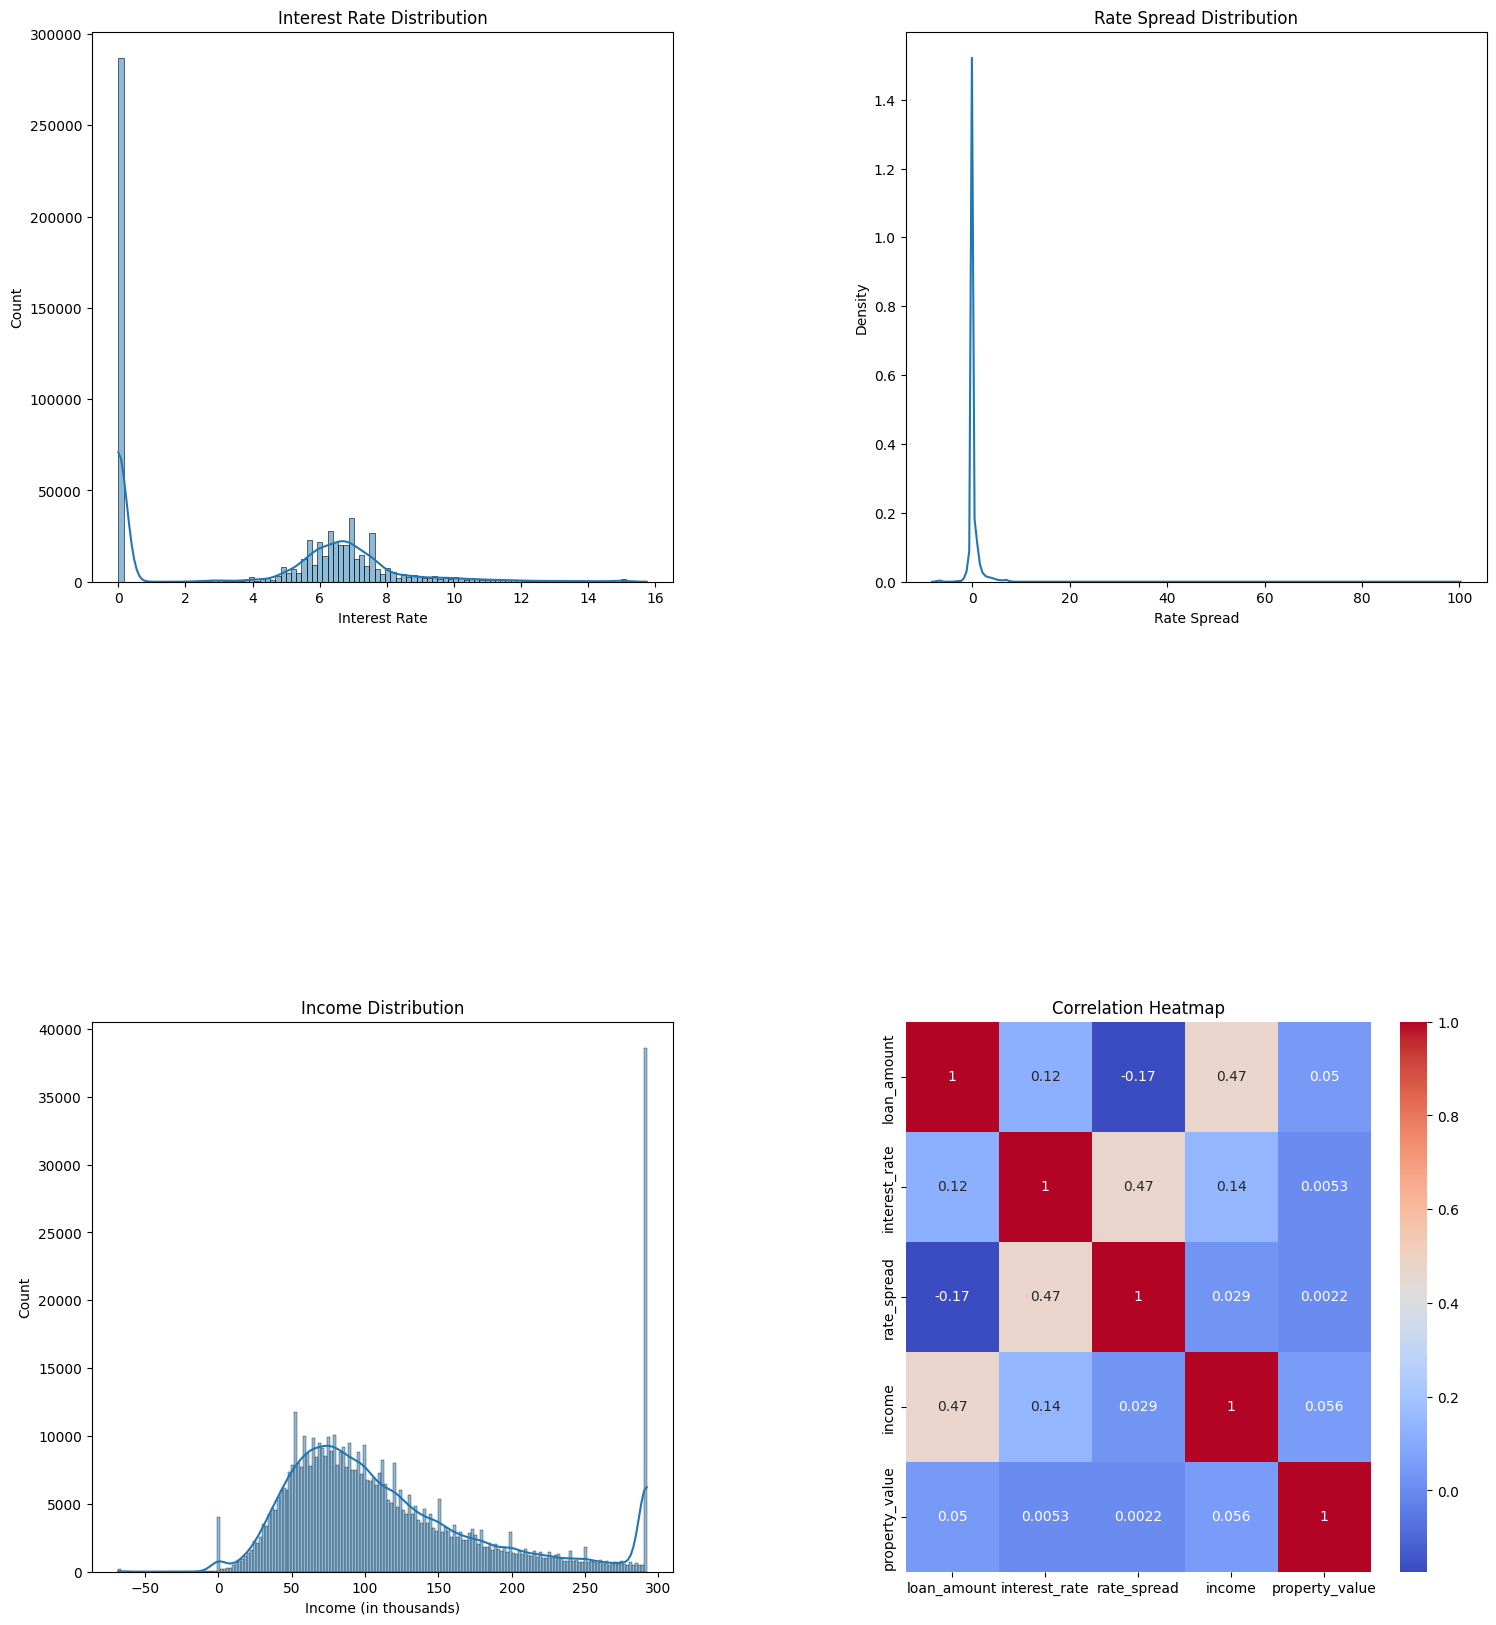

In [49]:
# Create a larger figure for subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 20))  # Increase figure size

# Summary Statistics (Display separately if needed, since it’s a table)
print(filtered_df[['loan_amount', 'interest_rate', 'rate_spread', 'income', 'property_value']].describe())

# Interest Rate
sns.histplot(filtered_df['interest_rate'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Interest Rate Distribution')
axes[0, 0].set_xlabel('Interest Rate')

# Rate Spread
sns.kdeplot(filtered_df['rate_spread'], ax=axes[0, 1])
axes[0, 1].set_title('Rate Spread Distribution')
axes[0, 1].set_xlabel('Rate Spread')

# Income
sns.histplot(filtered_df['income'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Income Distribution')
axes[1, 0].set_xlabel('Income (in thousands)')

# Correlation Heatmap
sns.heatmap(
    filtered_df[['loan_amount', 'interest_rate', 'rate_spread', 'income', 'property_value']].corr(), 
    annot=True, cmap='coolwarm', ax=axes[1, 1]
)
axes[1, 1].set_title('Correlation Heatmap')

# Adjust layout to reduce compression
plt.subplots_adjust(wspace=0.4, hspace=0.8)  # Increase spacing between subplots

# Display all plots
plt.show()

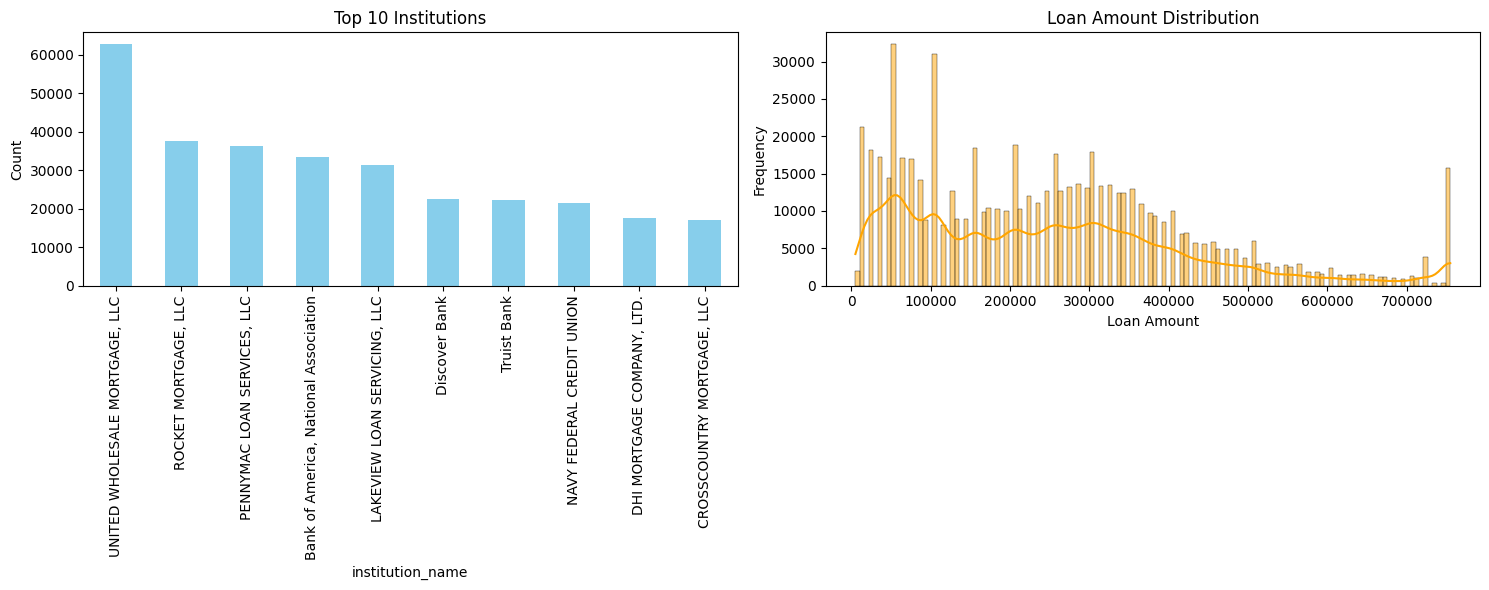

In [45]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # One row, two columns

# Institution Name Bar Chart
top_institutions = filtered_df['institution_name'].value_counts().head(10)
top_institutions.plot(kind='bar', ax=axes[0], color='skyblue', title='Top 10 Institutions')
axes[0].set_ylabel('Count')  # Add y-axis label
axes[0].tick_params(axis='x')  # Rotate x-axis labels

# Loan Amount Distribution
sns.histplot(filtered_df['loan_amount'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Loan Amount Distribution')
axes[1].set_xlabel('Loan Amount')
axes[1].set_ylabel('Frequency')  # Add y-axis label

# Adjust layout
plt.tight_layout()  # Ensure subplots fit within the figure area

# Display the plots
plt.show()

**Applicant Credit Score Types**

1 - Equifax Beacon 5.0 <br />
2 - Experian Fair Isaac <br />
3 - FICO Risk Score Classic 04 <br />
4 - FICO Risk Score Classic 98 <br />
5 - VantageScore 2.0 <br />
6 - VantageScore 3.0 <br />
7 - More than one credit scoring model <br />
8 - Other credit scoring model <br />
9 - Not applicable <br />
11 - Exempt <br />

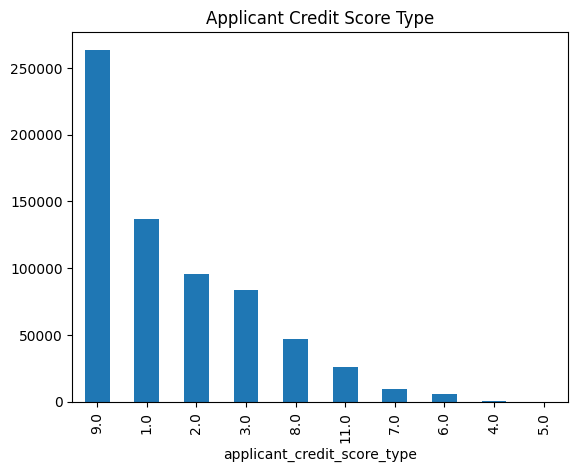

In [51]:
# Credit Score Type
filtered_df['applicant_credit_score_type'].value_counts().plot(kind='bar')
plt.title('Applicant Credit Score Type')
plt.show()

In [56]:
# Encode the 'action_taken' column with descriptive labels
action_taken_labels = {
    1: 'Loan originated',
    2: 'Application approved but not accepted',
    3: 'Application denied',
    4: 'Application withdrawn by applicant',
    5: 'File closed for incompleteness',
    6: 'Purchased loan',
    7: 'Preapproval request denied',
    8: 'Preapproval request approved but not accepted'
}

# Replace the numeric codes with descriptions
filtered_df['action_taken_encoded'] = filtered_df['action_taken'].map(action_taken_labels)

# Count the occurrences of each action_taken type
action_taken_counts = filtered_df['action_taken_encoded'].value_counts()

# Display the counts
print(action_taken_counts)

action_taken_encoded
Loan originated                                  274676
Application denied                               149479
Purchased loan                                   109417
Application withdrawn by applicant                79921
File closed for incompleteness                    40191
Application approved but not accepted             15261
Preapproval request approved but not accepted       698
Preapproval request denied                          229
Name: count, dtype: int64


Taking the top 10 banks and encoding them to make a model with

In [59]:
# Get the top 10 banks by frequency
top_10_banks = filtered_df['institution_name'].value_counts().head(10).index

# Create a new column to encode the top 10 banks
filtered_df['institution_encoded'] = filtered_df['institution_name'].apply(
    lambda x: x if x in top_10_banks else 'Other'
)

# Optional: You can use label encoding if you prefer numeric encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
filtered_df['institution_encoded'] = label_encoder.fit_transform(filtered_df['institution_encoded'])

# Check the encoded values
print(filtered_df[['institution_name', 'institution_encoded']].head())

     institution_name  institution_encoded
8440      Truist Bank                    9
8469      Truist Bank                    9
8470      Truist Bank                    9
8471      Truist Bank                    9
8472      Truist Bank                    9


In [61]:
selected_columns = ['institution_name', 'loan_amount', 'interest_rate', 'rate_spread', 'income', 
                    'applicant_credit_score_type', 'property_value', 'action_taken']
df_selected = filtered_df[selected_columns]

# Display the new DataFrame
df_selected.head(5)

,institution_name,loan_amount,interest_rate,rate_spread,income,applicant_credit_score_type,property_value,action_taken
8440,Truist Bank,205000.0,0.000,0.000,49.0,9.0,NaN,4.0
8469,Truist Bank,305000.0,4.375,0.000,148.0,9.0,0.0,6.0
8470,Truist Bank,695000.0,0.000,0.000,275.0,2.0,0.0,3.0
8471,Truist Bank,205000.0,4.125,0.140,57.0,3.0,0.0,2.0
8472,Truist Bank,755000.0,5.625,-1.524,292.0,2.0,0.0,2.0


In [62]:
# Replace all NaN or NA values with 0s
df_selected = df_selected.fillna(0)
df_selected.head(5)

,institution_name,loan_amount,interest_rate,rate_spread,income,applicant_credit_score_type,property_value,action_taken
8440,Truist Bank,205000.0,0.000,0.000,49.0,9.0,0.0,4.0
8469,Truist Bank,305000.0,4.375,0.000,148.0,9.0,0.0,6.0
8470,Truist Bank,695000.0,0.000,0.000,275.0,2.0,0.0,3.0
8471,Truist Bank,205000.0,4.125,0.140,57.0,3.0,0.0,2.0
8472,Truist Bank,755000.0,5.625,-1.524,292.0,2.0,0.0,2.0


In [ ]:
df_selected.to_csv('modeling.csv', index=False)